In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define image dimensions and paths
IMG_HEIGHT, IMG_WIDTH = 128, 128
dataset_dir = '../dataset/train/'
classes = os.listdir(dataset_dir)
print(f"Classes: {classes}")

# Initialize arrays to store data and labels
data = []
labels = []

# Load and preprocess images
for cls in classes:
    class_path = os.path.join(dataset_dir, cls)
    class_label = classes.index(cls)  # Convert class names to numeric labels
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        # Read and resize image
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        data.append(img)
        labels.append(class_label)

# Convert data and labels to numpy arrays
data = np.array(data, dtype='float32') / 255.0  # Normalize pixel values
labels = np.array(labels)

print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']
Data shape: (16500, 128, 128, 3), Labels shape: (16500,)
Training set: (11550, 128, 128, 3), Validation set: (2475, 128, 128, 3), Test set: (2475, 128, 128, 3)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),

    # Output layer
    Dense(11, activation='softmax')  # 11 classes (0-9, unknown)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\chathu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,611 (12.64 MB)

 Trainable params: 3,313,611 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Define training parameters
BATCH_SIZE = 32
EPOCHS = 20

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.1557 - loss: 2.3004 - val_accuracy: 0.5483 - val_loss: 1.3610
Epoch 2/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - accuracy: 0.5421 - loss: 1.3501 - val_accuracy: 0.7677 - val_loss: 0.7266
Epoch 3/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - accuracy: 0.6882 - loss: 0.8994 - val_accuracy: 0.8226 - val_loss: 0.5707
Epoch 4/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.7541 - loss: 0.7031 - val_accuracy: 0.8707 - val_loss: 0.4179
Epoch 5/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.8085 - loss: 0.5519 - val_accuracy: 0.8804 - val_loss: 0.3587
Epoch 6/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.8324 - loss: 0.4643 - val_accuracy: 0.8933 - val_loss: 0.3484
Epoch 7/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.8655 - loss: 0.3920 - val_accuracy: 0.9038 - val_loss: 0.3235
Epoch 8/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.8725 - loss: 0

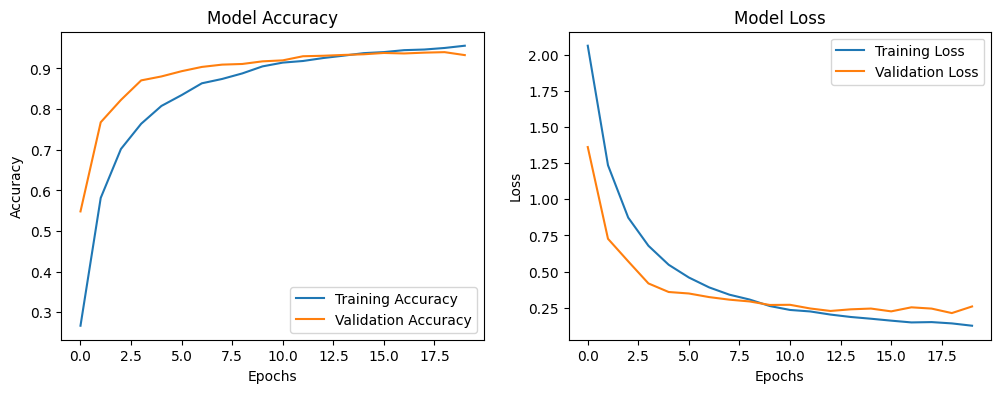

In [4]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [5]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9374 - loss: 0.2865
Test Accuracy: 94.46%


In [6]:
# Save the trained model
model.save('../models/hand_gesture_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [7]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the saved model
model = load_model('../models/hand_gesture_model.h5')

# Path to new test image
new_image_path = '../dataset/train/5/five_3.jpg'

# Preprocess the image
img = cv2.imread(new_image_path)
img = cv2.resize(img, (128, 128))
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img)
predicted_class = np.argmax(predictions)
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Class: 5
